# Doppler broadening of resonances

Please indicate your name below, since you will need to submit this notebook.

Don't forget to save your progress during the datalab to avoid any loss due to crashes.

In [ ]:
name='Alexander Hedene'

Previously we studied how energy-dependent cross sections can be reconstructed from the resonance parameters. These resonance parameters are a property of the nucleus, hence they do not depend on temperature. Therefore it can be considered that our reconstuction was related to 0 K temperature. In this datalab, we will study how temperature affects the cross sections, and we will perform an approximation to broaden the resonance of U-238 at 6.67 eV. The student is expected to read the chapter "Effects of nuclear motion" from [Nuclear Reactor Analysis from Duderstadt and Hamilton](https://deepblue.lib.umich.edu/bitstream/handle/2027.42/89079/1976_Nuclear_Reactor_Analysis.pdf) (page 45-52) along this section. The datalab provides only a brief review of the theory.

In the ENDF files the resonance parameters belong to the case when the target nuclei are at rest, however in practice this is not the case due to thermal motion with a thermal energy of $E\cong kT$. At temperatures typical for nuclear reactors this energy is only comparable to the neutron's kinetic energy if the neutron has also thermal energies. Execute code cell below to inspect thermal energies at typical temperatures.

In [1]:
k=8.617333262145e-5 #Boltzmann constant in eV/K
Temps=[293,300,600,900,1200] #in K
m=1.67492749804E-27 #kg
eVtoJ=1.60217662E-19

for T in Temps:
    print('Thermal energy of nuclei at {} K: {:.4f} eV; and neutron speed: {:.2f} km/s'.format(T,
                                                                               k*T, 
                                                                               (2*k*T*eVtoJ/m)**(1/2)/1000))

Thermal energy of nuclei at 293 K: 0.0252 eV; and neutron speed: 2.20 km/s
Thermal energy of nuclei at 300 K: 0.0259 eV; and neutron speed: 2.22 km/s
Thermal energy of nuclei at 600 K: 0.0517 eV; and neutron speed: 3.15 km/s
Thermal energy of nuclei at 900 K: 0.0776 eV; and neutron speed: 3.85 km/s
Thermal energy of nuclei at 1200 K: 0.1034 eV; and neutron speed: 4.45 km/s


In later datalabs we will study, how this thermal motion can result in upscattering of low-energy neutrons (ie. neutrons might gain energy in a scattering event).

However thermal motion must be taken into account even if the neutron's kinetic energy is way above the thermal energy of the nuclei: namely at resonances, since their width is is comparable with these energies, therefore the energy dependence of the cross sections close to resonances strongly depends on temperatue. This is referred to as Doppler effect or Doppler broadening, and is the subject of this notebook. 

In case of thermal motion, one needs to take into account the relative speed ($v_r=|\mathbf{v}-\mathbf{V}|$) between the neutron and the nuclei. The interaction frequency can be given as

$$|\mathbf{v}-\mathbf{V}|\sigma(|\mathbf{v}-\mathbf{V}|)N$$

where $N$ is the number density of the nuclei.

If we assume that the distribution of nuclear velocities is given by the Maxwell-Boltzmann distribution $M(\mathbf{V},T)$, then one can arrive to the formula describing the thermally averaged cross sections:

$$\bar\sigma(v,T)=\frac{1}{v}\int d^3 V |\mathbf{v}-\mathbf{V}|\sigma(|\mathbf{v}-\mathbf{V}|)M(\mathbf{V},T)$$

We can recall from the earlier datalab that the Single-level Breit-Wigner (SLBW) formula for the radiative capture cross section is

$$\sigma_\gamma(E)=\sigma_0\frac{\Gamma_\gamma}{\Gamma}\Big(\frac{E_0}{E}\Big)^{1/2}\frac{1}{1+y^2}$$

with

$$y=\frac{2}{\Gamma}(E-E_0)$$

and

$$\sigma_0=2.608\cdot 10^6\frac{(A+1)^2}{A^2E_0(eV)}\frac{\Gamma_n}{\Gamma}g$$


So now we "only" need to bring everything together to arrive to a formula describing the temperature dependent cross sections. Again, for the proper math we refer the student to the DH book.

Let us first reconstruct the first resonance of U-238 with the SLBW formalism as we did during the previous datalab.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
E0s, Js, GNs, GGs, GFAs, GFBs = np.loadtxt('data/U238res.dat').transpose() #transpose so we can read the columns
E0,J,GN,GG=E0s[0],Js[0],GNs[0],GGs[0]

I=0.0
A=238
G=GN+GG                  #total line width
g = (2*J+1)/(2*(2*I+1))  #statistical spin factor
sigma_0 = 2.608e6 * (A+1)**2/(A**2 * E0) * (GN/G) * g


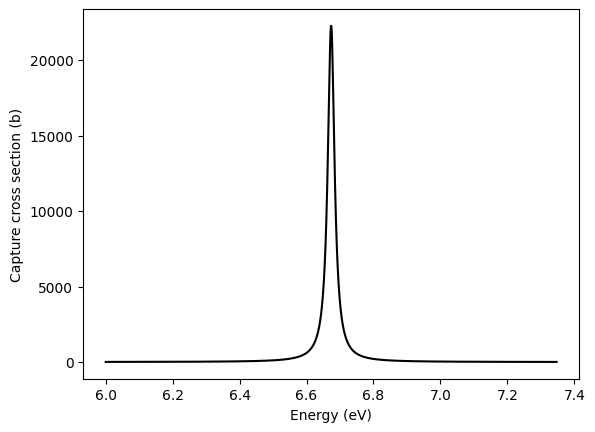

In [3]:
E=np.linspace(6., 7.347, 1000)
y = (2/G)*(E - E0)
sigma_g_0K = sigma_0 * (GG/G) * np.sqrt(E0/E) * (1/(1+y**2))

plt.figure(0)
plt.plot(E, sigma_g_0K,'k')

plt.xlabel('Energy (eV)')
plt.ylabel('Capture cross section (b)')            
plt.show()

## Doppler broadening

Now we will try to reconstruct the resonance with the Doppler broadening function. After substituting the SLBW formalism and the Maxwell-Boltzmann distribution into the definition of the thermally averaged cross section, we can arrove to

$$\sigma_\gamma(E,T)=\sigma_0\frac{\Gamma_\gamma}{\Gamma}\Big(\frac{E_0}{E}\Big)^{1/2}\Psi(\zeta,x)$$

with

$$x=2\frac{E-E0}{\Gamma}$$

$$\zeta=\frac{\Gamma}{\Gamma_D}$$

and the Doppler width is defined as:

$$\Gamma_D=\Big(\frac{4E_0kT}{A}\Big)^{1/2}$$

The broadening function is

$$\Psi(\zeta,x)=\frac{\zeta}{2}\int_{-2E/\Gamma}^\infty \frac{dy}{1+y^2}\Bigg[\exp\Big(-\frac{(v-v_r)^2}{2v_{th}^2}\Big)-\exp\Big(-\frac{(v+v_r)^2}{2v_{th}^2}\Big)\Bigg]$$

This integral can be evaluated numerically. However for simplicity, in the following we will use an approximate expression from Bethe and Placzek (the rationale and the limitation of this approximation is described in detail in the DH book, nevertheless it is rather accurate at lower temperature and for not too low-energy resonances).

$$\Psi(\zeta,x) \sim \psi(\zeta,x)=\frac{\zeta}{2\sqrt{\pi}}\int_{-\infty}^{\infty}dy\frac{\exp\Big[-\frac{1}{4}(x-y)^2\zeta^2\Big]}{1+y^2}$$

To make your life easier, this function was implemented as the `psi()` Python function. It uses the `scipy.integrate.quad` method to perform the integration. Excecute and review the code cell below. You can test it, by comparing the returned values for various input values to the tabulated values found in Table 2-2 of the DH book.

In [4]:
from scipy.integrate import quad

def psi(zeta,x):
    """
    Evaluating the Doppler Broadening Psi function (the simplified given by Bethe and Placzek).
    See DH Eq. (2.97)
    
    Parameters
    ----------
    zeta : float
        zeta parameter, where zeta=Gamma/Gamma_D
    x : list or float
        x=2*(E-E0)/Gamma. Can be either a single value or a list of values. In case it is a list
        psi is evaluated for each x_i value.
        
    Examples
    --------
    >>> psi(0.15,4)
    0.11268361165162198
    >>> psi(0.15,[4,6])
    array([0.11268361, 0.10165318])
    
    Note
    ----
    The function tests whether it is possible to loop through the values of x. In that case it
    returns an array of values. Otherwise it will consider x being an int or float, and returns
    a single value. Nevertheless, no further exception is handled (eg the function breaks 
    if x is a string)
    """
    def integrand(y,zeta,x):
        return (zeta/(2*np.sqrt(np.pi)))*(np.exp(-0.25*(x-y)**2*zeta**2))/(1+y**2)
    
    try:
        resu=[]
        for xi in x:
            resu.append(quad(integrand, -np.inf, np.inf, args=(zeta, xi))[0])
        return np.array(resu)
    except TypeError:
        return quad(integrand, -np.inf, np.inf, args=(zeta, x))[0]

Now the only thing left is to reconstruct the broadened resonance at various temperatures. Complete the code cell below. And conclude your findings.

The integral under the resonance at T=0 K is 848.5918851347317
The integral under the resonance at T=300 K is 846.1872897455089
The integral under the resonance at T=600 K is 847.6974936822462
The integral under the resonance at T=900 K is 848.5241972785525
The integral under the resonance at T=1200 K is 848.4898177737562


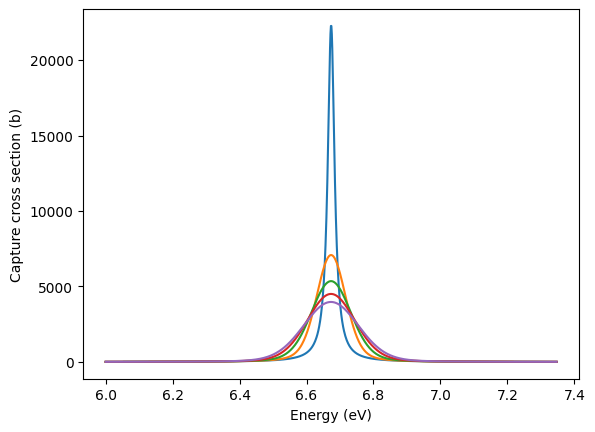

In [ ]:
plt.figure()
plt.plot(E,sigma_g_0K,label='T=0 K')
print('The integral under the resonance at T=0 K is {}'.format(np.trapz(sigma_g_0K,E)))

k_eV = 8.6173333e-5
for T in [300,600,900,1200]:

    GD= np.sqrt(4*E0*k_eV*T/A)#Doppler width 
    zeta= G/ GD #zeta parametr
    x= 2*(E-E0)/G  #x values
    psi_vals = psi(zeta, x)
    sigma_g = sigma_0 * (GG / G) * np.sqrt(E0 / E) * psi_vals #broadened cross section

    plt.plot(E,sigma_g,label='T={} K'.format(T))
    print('The integral under the resonance at T={} K is {}'.format(T,np.trapz(sigma_g,E)))

plt.xlabel('Energy (eV)')
plt.ylabel('Capture cross section (b)')     
plt.legend()       
plt.show()

From the graph it can be seen that higher 